In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import random


In [7]:
#parameters 参数
grid_size = 100
months = 12
##states of the dandelion蒲公英的状态
empty, seed, seedling, mature = 0, 1, 2, 3
number_of_initial_dandelion = 1
seeds_per_dandelion = 20
wind_speed = np.array([3, 4, 5, 5, 4, 3, 3, 4, 6, 7, 5, 4])
germination_probability = np.array([0.05, 0.1, 0.4, 0.5, 0.45, 0.2, 0.2, 0.25, 0.4, 0.35, 0.15, 0.05])
death_rate_of_mature = np.array([0.1, 0.05, 0.02, 0.01, 0.01, 0.05, 0.1, 0.05, 0.02, 0.02, 0.05, 0.1])


In [8]:
#初始化蒲公英位置
def initialise_grid_corner(size) :
    grid = np.zeros((size, size), dtype = int)
    grid[0, 0] = mature

    return grid

grid = initialise_grid_corner(grid_size)

In [9]:
#Evolution func 过程func（月循环）
def evolve_month(current_grid, in_which_month) :
    new_grid = current_grid.copy()
    size = new_grid.shape[0]

#库函数numpy.argwhere is a funtion used to return a the coordinates of elements in an array that satisfy the given situation
    dandelion_locations = np.argwhere(current_grid == mature)

    current_wind_speed = wind_speed[in_which_month]
    current_germination_probability = germination_probability[in_which_month]
    current_death_rate = death_rate_of_mature[in_which_month]

    for row, column in dandelion_locations :
        num_seeds = seeds_per_dandelion 
        
        for i in range(num_seeds):
            
            dr = np.random.randint(-current_wind_speed, current_wind_speed)
            dc = np.random.randint(-current_wind_speed, current_wind_speed)
            
            #库函数numpy.clip() is to limit the values in a NumPy array to be within a specified range
            land_r = np.clip(row + dr, 0, size - 1)
            land_c = np.clip(column + dc, 0, size - 1)
            
            #种子的扩散位置
            #Only an empty cell can receive a seed
            if new_grid[land_r, land_c] == empty :
                new_grid[land_r, land_c] = seed

    seed_locations = np.argwhere(new_grid == seed)

    for row0, column0 in seed_locations :
        
        if np.random.rand() < current_germination_probability :
            new_grid[row0, column0] = seedling 
        
        else:
            new_grid[row0, column0] = empty

    seedling_locations = np.argwhere(new_grid == seedling)
    
    for row1, column1 in seedling_locations :
            #no probability or check needed here, since it is mature state
            new_grid[row1, column1] = mature

    mature_locations = np.argwhere(new_grid == mature)
    
    for row2, column2 in mature_locations :
        if np.random.rand() < current_death_rate :
            new_grid[row2, column2] = empty
        
            
    return new_grid
                
                
   

Starting Mature Dandelions (Month 0): 1
Month 01 Dandelions: 2
Month 02 Dandelions: 2
Month 03 Dandelions: 10
Month 04 Dandelions: 26
Month 05 Dandelions: 49
Month 06 Dandelions: 56
Month 07 Dandelions: 61
Month 08 Dandelions: 92
Month 09 Dandelions: 165
Month 10 Dandelions: 261
Month 11 Dandelions: 306
Month 12 Dandelions: 292


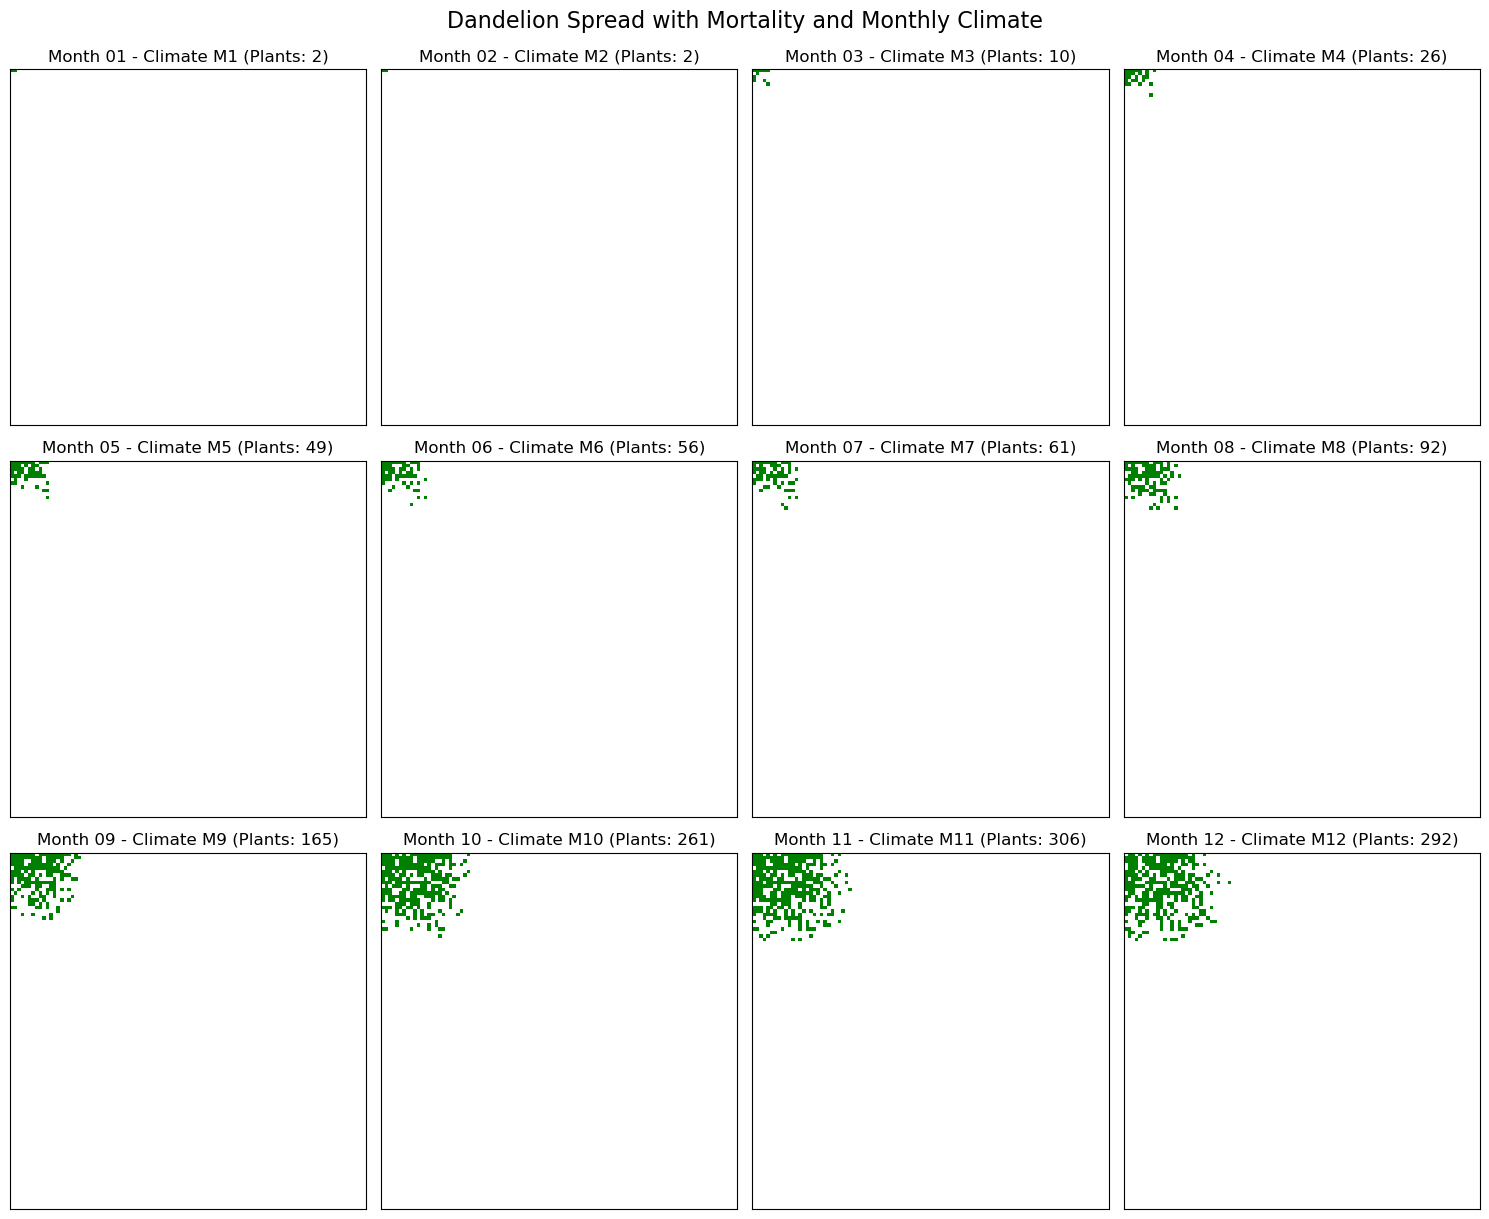


--- SUMMARY RESULTS ---
Monthly Dandelion Counts (M0-M12): [1, 2, 2, 10, 26, 49, 56, 61, 92, 165, 261, 306, 292]
Final Mature Dandelion Count: 292 plants


In [10]:
#以下为Gemini模型生成
#Simulation and Visualization
COLOR_MAP = plt.cm.colors.ListedColormap(['white', 'yellow', 'orange', 'green']) 
BOUNDS = [0, 1, 2, 3, 4] 
NORM = plt.cm.colors.BoundaryNorm(BOUNDS, COLOR_MAP.N) 

# Prepare the plot for 12 months (3 rows, 4 columns)
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten() 
dandelion_counts = [np.sum(grid == mature)]
current_grid = grid.copy()

print(f"Starting Mature Dandelions (Month 0): {dandelion_counts[0]}")

# Run the 12-month simulation
for month_index in range(months): # Loop from 0 to 11
    # Run evolution, passing the current month's index
    current_grid = evolve_month(current_grid, month_index)
    
    # Track the count of mature dandelions
    count = np.sum(current_grid == mature)
    dandelion_counts.append(count)
    
    # Plotting the result for the current month
    ax = axes[month_index]
    ax.imshow(current_grid, cmap=COLOR_MAP, norm=NORM)
    ax.set_title(f'Month {month_index + 1:02d} - Climate M{month_index + 1} (Plants: {count})')
    ax.set_xticks([]); ax.set_yticks([])
    
    print(f"Month {month_index + 1:02d} Dandelions: {count}")

# Final Plot Adjustments and Output
plt.tight_layout()
plt.suptitle("Dandelion Spread with Mortality and Monthly Climate", fontsize=16, y=1.02)
plt.show()

print("\n--- SUMMARY RESULTS ---")
print(f"Monthly Dandelion Counts (M0-M12): {dandelion_counts}")
print(f"Final Mature Dandelion Count: {dandelion_counts[-1]} plants")